# Business Problem Understanding

### Context
Asuransi adalah layanan yang disediakan oleh perusahaan asuransi untuk menanggulangi risiko kerugian finansial bagi kelompok atau seseorang yang membayar premi berdasarkan perjanjian. Asuransi memiliki berbagai macam jenis, salah satunya adalah asuransi perjalanan. Asuransi perjalanan merupakan jenis asuransi dalam mengalihkan risiko kerugian finansial yang timbul selama berada dalam perjalanan. Perusahaan asuransi harus dapat melakukan analisis yang tepat dalam memprediksi apakah pembayar premi akan mengajukan klaim atau tidak di masa depan untuk meminimalkan kerugian yang diderita perusahaan. 

Target :

0 : Status Klaim No

1 : Status Klaim Yes

### Problem Statement
Pemrosesan klaim terkenal sulit dan memakan waktu karena data asuransi sangat luas dan kompleks. Perusahaan ingin mengurangi biaya dan waktu pemrosesan yang dapat meningkatkan efisiensi serta dapat meminimalkan kerugian dengan mengetahui apakah pembayar premi akan mengajukan klaim atau tidak.

### Goals
Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk dapat memprediksi kemungkinan status klaim (Ya atau Tidak) pemilik asuransi dari berbagai atribut asuransi perjalanan yang terkait, sehingga dapat memfokuskan pada yang mengajukan klaim dan dapat meminimalkan kerugian yang diderita perusahaan.

### Analytic Approach
Menganalisis data untuk menemukan pola dari fitur-fitur yang ada, sehingga dapat mengetahui pembayar premi yang akan mengajukan Klaim. Dengan membangun suatu model yang dapat membantu perusahaan untuk memprediksi status klaim pemilik asuransi.

### Metric Evaluation
Berdasarkan hal tersebut, maka yang bisa dilakukan adalah dengan membuat model yang dapat mengatasi konsekuensinya. Jadi metric yang dapat digunakan adalah precision dan recall.

# Data Understanding

### Attribute Information
| Attribute | Data Type | Description |
| --- | --- | --- |
| Agency | Object | Nama agensi |
| Agency_Type | Object | Jenis agensi asuransi perjalanan |
| Distribution_Channel | Object | Saluran distribusi agensi asuransi perjlanan |
| Product_Name | Object | Nama produk asuransi perjalanan |
| Gender | Object | Jenis kelamin tertanggung |
| Duration | Integer | Durasi perjalanan |
| Destination | Object | Tujuan perjalanan |
| Net_Sales | Float | Jumlah penjualan polis asuransi perjalanan |
| Commision | Float | Komisi yang diterima |
| Age | Integer | Usia tertanggung |
| Claim | Float | 0 – Status klaim No, 1 – Status klaim Yes |

In [32]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [33]:
# Load Dataset
df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [34]:
# Count dan Datatype untuk tiap Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


# Data Cleaning

In [35]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[ADM, C2B]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Comprehensive Plan, Travel Cruise Protect]"
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[326, 227]"
6,Destination,object,0,0.00,138,"[GUYANA, FAROE ISLANDS]"
7,Net Sales,float64,0,0.00,1006,"[123.75, 8.63]"
8,Commision (in value),float64,0,0.00,915,"[160.38, 14.0]"
9,Age,int64,0,0.00,89,"[45, 72]"


In [36]:
# Mengganti Label Kolom "Claim" dengan Nilai 0 dan 1 (No = 0 dan Yes = 1)
df['Claim'].replace({'No': 0, 'Yes': 1},inplace = True)

# Mengganti Spasi pada Nama Kolom dengan Underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

# Rename Kolom
df.rename(
columns=({'Commision_(in_value)': 'Commision'}), inplace=True)

# Mengganti tipe Data pada Kolom Claim
df['Claim'] = df['Claim'].astype('float')

In [37]:
# Pengecekan Data Kembali
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[TTW, ART]"
1,Agency_Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution_Channel,object,0,0.00,2,"[Offline, Online]"
3,Product_Name,object,0,0.00,26,"[Cancellation Plan, Single Trip Travel Protect..."
4,Gender,object,31647,71.39,2,"[F, M]"
5,Duration,int64,0,0.00,437,"[463, 281]"
6,Destination,object,0,0.00,138,"[MALAYSIA, PORTUGAL]"
7,Net_Sales,float64,0,0.00,1006,"[24.9, 6.71]"
8,Commision,float64,0,0.00,915,"[15.5, 17.5]"
9,Age,int64,0,0.00,89,"[81, 27]"


### Visualisasi Missing Value/Data yang Hilang pada Dataframe dengan Menggunakan Library Missingno

reference : 

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

### Barplot

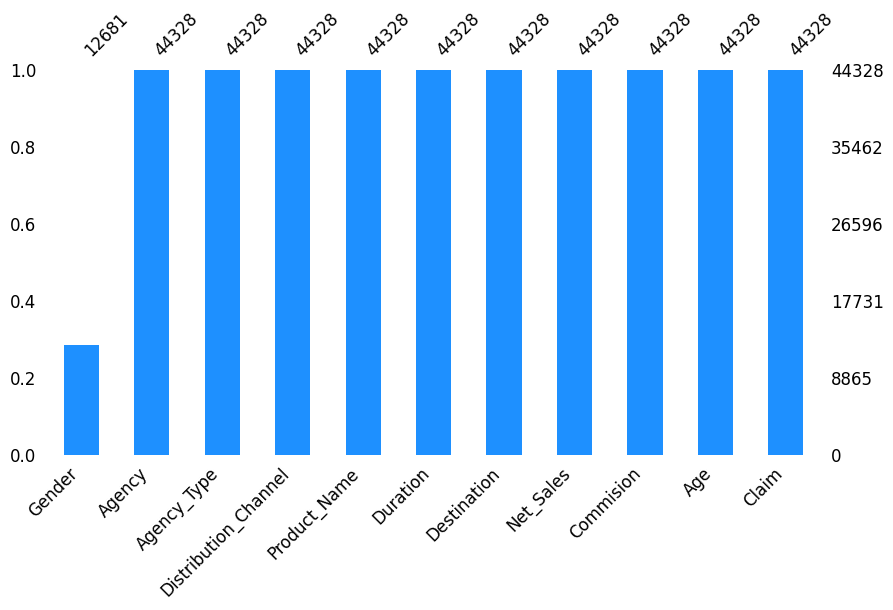

In [38]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

##### Secara garis besar:
- Terlihat dari Barplot di atas, kolom Gender memiliki missing value/Data yang hilang.
- Informasi tersebut juga dapat diketahui dari tabel, dimana kolom Gender memiliki missing value lebih dari 71% dan tidak ada atribut lain yang dapat membantu untuk mengetahui individu tersebut laki-laki atau perempuan. Oleh karena itu, data bisa dihapus saja.

In [39]:
# Cek Distribusi Data dari Kolom Claim
results = df['Claim'].value_counts()
results

0.0    43651
1.0      677
Name: Claim, dtype: int64

In [40]:
# Cek Proporsi 
print('Proporsi Klaim Yes: ' , results[1]/(results[0] + results[1]))

Proporsi Klaim Yes:  0.01527251398664501


In [41]:
# Cek nilai maksimum dan minimum untuk melihat apakah ada yang tidak valid/abnormal
df.describe()

,Duration,Net_Sales,Commision,Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600,0.015273
std,109.153961,48.661970,19.625637,13.954926,0.122636
min,-1.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


##### Dapat dilihat bahwa:
- Pada atribut `Age`, memiliki nilai hingga 118. Asumsikan bahwa Age maksimum tidak boleh lebih dari 99.
- Pada atribut `Duration`, memiliki nilai hingga 4881 dan juga nilai negatif. Duration tidak bisa negatif dan asumsikan bahwa maksimum asuransi tidak boleh lebih dari 731 hari (365 + 366 hari mengingat jika itu adalah tahun kabisat).
- Pada atribut `Commision`, terlihat valid.
- Pada atribut `Net_Sales`, memiliki nilai negatif hingga -357. Net_Sales bisa bernilai negatif dikarenakan ada kemungkinan Klaim-nya dibayarkan.

In [42]:
# Hitung Persentase Duration negatif
(df['Duration'] < 0).sum()/df.shape[0]*100

0.004511820970943873

In [43]:
# Hitung Persentase Duration > 731
(df['Duration'] > 731).sum()/df.shape[0]*100

0.03158274679660711

In [44]:
# Cek Persentase Age
(df['Age'] > 99).sum()/df.shape[0]*100

1.524995488179029

Karena Persentasenya lebih dari 0,05 data tidak akan dihapus dan usia maksimumnya diasumsikan menjadi 99.

In [45]:
# Fungsi untuk Membuat Kelompok Umur
def age_convert(Age):
    result = ''
    if(Age <= 21):
        result = 'Child'
    elif(Age <= 50):
        result = 'Adult'
    else:
        result = 'Senior'
    return result

In [46]:
def data_clean(df):
    # Menambah Kolom Baru Age_Group
    df['Age_Group'] = df['Age'].map(lambda x: age_convert(x))

    # Drop Gender
    df.drop('Gender',axis =1, inplace=True)
    
    # Duration minimum 1 hari, maka dihitung dengan median.
    df['Duration'][df['Duration'] < 0] = df['Duration'].median()

    # Duration yang lebih dari 731 akan dianggap sebagai 731
    df['Duration'][df['Duration'] > 731] = 731
    
    # Mengganti usia yang lebih besar dari 99 dengan rata-rata usia Senior
    df['Age'][df['Age'] > 99] = df[df['Age_Group'] == 'Senior']['Age'].mean()

In [47]:
data_clean(df)

In [48]:
df.describe()

,Duration,Net_Sales,Commision,Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,48.241969,40.550948,9.707692,39.129130,0.015273
std,74.321845,48.661970,19.625637,10.551477,0.122636
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,731.000000,810.000000,283.500000,88.000000,1.000000


### Data Bersih

In [49]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[RAB, JZI]"
1,Agency_Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution_Channel,object,0,0.0,2,"[Offline, Online]"
3,Product_Name,object,0,0.0,26,"[24 Protect, Annual Silver Plan]"
4,Duration,int64,0,0.0,423,"[262, 424]"
5,Destination,object,0,0.0,138,"[NEPAL, FAROE ISLANDS]"
6,Net_Sales,float64,0,0.0,1006,"[8.91, 31.71]"
7,Commision,float64,0,0.0,915,"[6.67, 69.16]"
8,Age,float64,0,0.0,89,"[29.0, 63.0]"
9,Claim,float64,0,0.0,2,"[0.0, 1.0]"


# Data Analysis

<AxesSubplot: xlabel='Claim', ylabel='Age'>

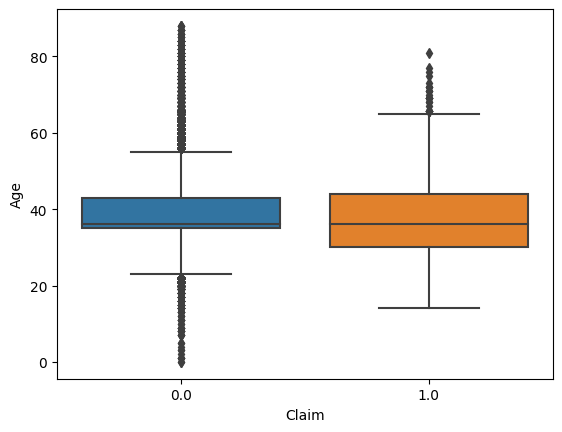

In [50]:
plt.subplot
sns.boxplot(data=df,y='Age', x='Claim')

<AxesSubplot: xlabel='Claim', ylabel='Duration'>

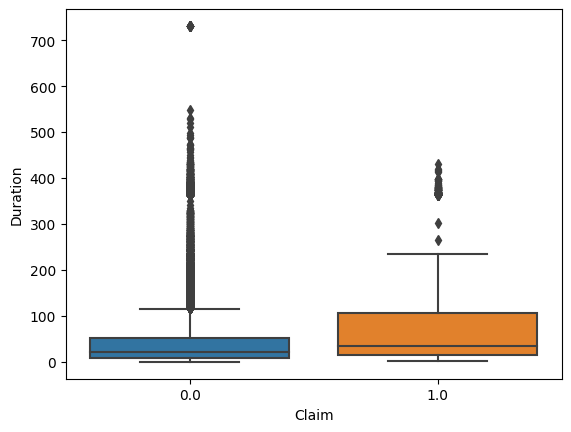

In [51]:
plt.subplot
sns.boxplot(data=df,y='Duration', x='Claim')

<AxesSubplot: xlabel='Claim', ylabel='Commision'>

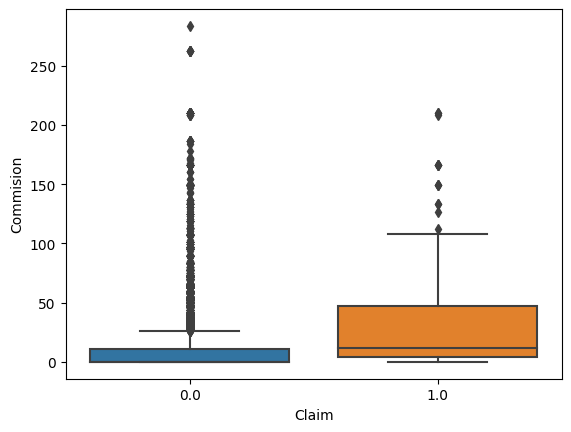

In [52]:
plt.subplot
sns.boxplot(data=df,y='Commision', x='Claim')

<AxesSubplot: xlabel='Claim', ylabel='Net_Sales'>

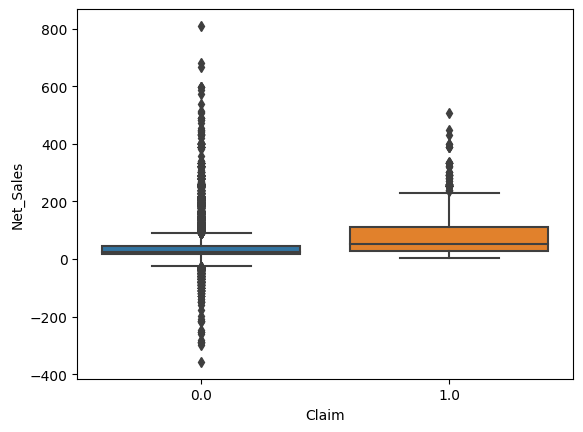

In [53]:
plt.subplot
sns.boxplot(data=df,y='Net_Sales', x='Claim')

##### Berdasarkan boxplot di atas: 
Skewness tidak akan dikoreksi karena datanya valid dan akan dibiarkan apa adanya.

In [54]:
for i in df.drop(columns=['Claim','Age','Duration','Commision','Net_Sales']).columns:
    Agency_df = df.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(Agency_df.fillna(0.0, inplace=True), Agency_df.sort_values(by=[1.0], ascending=False))

None

Claim,0.0,1.0
Agency,,
C2B,0.929254,0.070746
LWC,0.936264,0.063736
KML,0.982206,0.017794
CCR,0.984127,0.015873
CSR,0.985294,0.014706
CBH,0.985507,0.014493
TTW,0.985507,0.014493
CWT,0.989298,0.010702
JWT,0.992337,0.007663


None

Claim,0.0,1.0
Agency_Type,,
Airlines,0.964061,0.035939
Travel Agency,0.992589,0.007411


None

Claim,0.0,1.0
Distribution_Channel,,
Online,0.984715,0.015285
Offline,0.985450,0.014550


None

Claim,0.0,1.0
Product_Name,,
Annual Gold Plan,0.887324,0.112676
Annual Silver Plan,0.888205,0.111795
Annual Travel Protect Gold,0.888889,0.111111
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.930412,0.069588
Annual Travel Protect Silver,0.932203,0.067797
Annual Travel Protect Platinum,0.941176,0.058824
Bronze Plan,0.943098,0.056902


None

Claim,0.0,1.0
Destination,,
COSTA RICA,0.750000,0.250000
CZECH REPUBLIC,0.953488,0.046512
SINGAPORE,0.955002,0.044998
ICELAND,0.962025,0.037975
ISRAEL,0.969697,0.030303
...,...,...
GUADELOUPE,1.000000,0.000000
GHANA,1.000000,0.000000
GEORGIA,1.000000,0.000000


None

Claim,0.0,1.0
Age_Group,,
Child,0.974729,0.025271
Senior,0.983323,0.016677
Adult,0.985108,0.014892


##### Berdasarkan tabel di atas, dapat disimpulkan:
1. Tertanggung yang memilih `Agency C2B` lebih cenderung mengajukan Klaim dibandingkan `Agency` yang lain.
2. Tertanggung yang memilih `Agency_Type Airlines` lebih cenderung mengajukan Klaim daripada `Travel Agency`.
3. Tertanggung yang memilih `Distribution_Channel Online` lebih cenderung mengajukan Klaim daripada `Offline`.
4. Tertanggung yang memilih `Product_Name Annual Gold Plan` lebih cenderung mengajukan Klaim  dibandingkan `Product_Name` yang lain, tetapi bedanya sangat tipis-tipis antara satu sama lain.
5. Tertanggung dengan `Destination Costa Rica` lebih cenderung mengajukan Klaim dibandingkan dengan `Destination` yang lain.
6. Tertanggung yang termasuk dalam `Age_Group Child` lebih cenderung mengajukan Klaim daripada `Age_Group` yang lain.

# Data Preprocessing

In [55]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim,Age_Group
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57.0,0.0,Senior
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33.0,0.0,Adult
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26.0,0.0,Adult
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59.0,0.0,Senior
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28.0,0.0,Adult


In [56]:
def feature_processing(df):
    # frequency encoding, label encoding and one-hot encoding.
    fe = df.groupby('Destination').size()/len(df)
    df.loc[:,'Dest_fe'] = df['Destination'].map(fe)
    fe_1 = df.groupby('Agency').size()/len(df)
    df.loc[:,'Agency_fe'] = df['Agency'].map(fe_1)
    fe_2 = df.groupby('Product_Name').size()/len(df)    
    df.loc[:,'Product_Name_fe'] = df['Product_Name'].map(fe_2)
    df.drop(columns='Agency',axis=1,inplace=True)
    df.drop(columns='Destination',axis=1,inplace=True)
    df.drop(columns='Product_Name',axis=1,inplace=True)
    df.drop(columns='Age_Group',axis=1,inplace=True)
    df = pd.get_dummies(df, columns=['Agency_Type','Distribution_Channel'], drop_first=True)

In [57]:
feature_processing(df)

In [58]:
df.head(5)

,Agency_Type,Distribution_Channel,Duration,Net_Sales,Commision,Age,Claim,Dest_fe,Agency_fe,Product_Name_fe
0,Airlines,Online,365,216.0,54.0,57.0,0.0,0.209055,0.129783,0.021995
1,Travel Agency,Online,4,10.0,0.0,33.0,0.0,0.093372,0.556217,0.292795
2,Airlines,Online,19,22.0,7.7,26.0,0.0,0.035463,0.100005,0.086492
3,Travel Agency,Online,20,112.0,0.0,59.0,0.0,0.039321,0.556217,0.210725
4,Airlines,Online,8,16.0,4.0,28.0,0.0,0.209055,0.129783,0.064226


In [59]:
df = pd.get_dummies(df, columns=['Agency_Type','Distribution_Channel'], drop_first=True)
df.head(5)

,Duration,Net_Sales,Commision,Age,Claim,Dest_fe,Agency_fe,Product_Name_fe,Agency_Type_Travel Agency,Distribution_Channel_Online
0,365,216.0,54.0,57.0,0.0,0.209055,0.129783,0.021995,0,1
1,4,10.0,0.0,33.0,0.0,0.093372,0.556217,0.292795,1,1
2,19,22.0,7.7,26.0,0.0,0.035463,0.100005,0.086492,0,1
3,20,112.0,0.0,59.0,0.0,0.039321,0.556217,0.210725,1,1
4,8,16.0,4.0,28.0,0.0,0.209055,0.129783,0.064226,0,1


In [60]:
X = df.drop('Claim', axis = 1)
Y = df['Claim']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, random_state = 7)

# Modeling & Evaluation

### Random Forest Classifier

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

0.9834574028122415
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13107
         1.0       0.11      0.02      0.04       192

    accuracy                           0.98     13299
   macro avg       0.55      0.51      0.51     13299
weighted avg       0.97      0.98      0.98     13299



### Logistic Regression

In [63]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)
y_pred = logr.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9854124370253402
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13107
         1.0       0.00      0.00      0.00       192

    accuracy                           0.99     13299
   macro avg       0.49      0.50      0.50     13299
weighted avg       0.97      0.99      0.98     13299



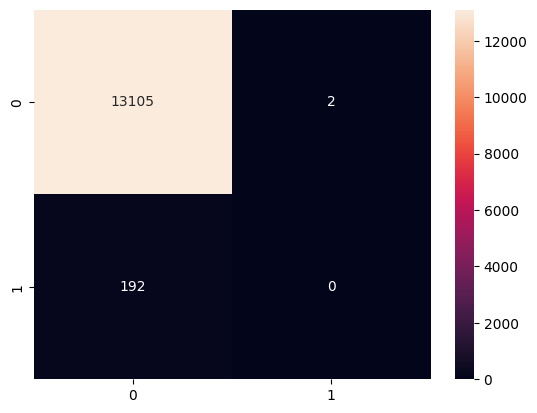

In [64]:
# Computing Metrics
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d')
plt.show()

# Conclusion & Recommendation

Proyek di atas menggunakan Machine Learning untuk memprediksi apakah pembayar premi akan mengajukan Klaim dengan membuat model menggunakan Random Forest Classifier dan Logistic Regression. Pemilihan fitur dapat dilakukan lebih jauh untuk dapat meningkatkan model dengan mengatasi masalah imbalance dataset menggunakan undersampling, oversampling atau SMOTE. Namun proyek ini berhenti pada baseline model karena hasil precision dan recall cukup bagus.

### Pickle

In [65]:
import pickle

with open('TI_pickle','wb') as r:
    pickle.dump(logr,r)

In [66]:
with open('TI_pickle','rb') as r:
    lr = pickle.load(r)